## Variant 2: Train and test the model with one time series

The change that we are going to apply is the following: instead of using all time series at once either in the training or in the test set, we will build different models (trained and tested with different time series but with same architecture) for each time series by keeping the same percentages that we used before (30% for training and 70% for testing).

## Setup

Import the necessary libraries.

In [158]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

## Load the data

We will choose at random only one time series in each dataset and it is going to be divided into training and test sets where 30% are used for training and 70% as test set.

### Training set

In this section, we will retrieve one time series per dataset, then remove anomalies to train our model with only normal points. In addition, we standardize the dataset, then we reshape our dataset in a way that the number of columns equals the window length (w = 32).

In [159]:
from sklearn.preprocessing import StandardScaler
Data_names = np.array(["UD1","UD2","UD3","UD4"])

for Data_name in Data_names:
    if Data_name == "UD1":
        Folder = "A1Benchmark/real_"
        Col_Anomaly = "is_anomaly"
        UD1=[]
        UD1_Noise= []
        IndicesUD1= []
        IndicesUD1_Noise= []
        UD1_Test=[]
        IndicesUD1_Test= []
    else:
       
        if Data_name == "UD2":
            Folder = "A2Benchmark/synthetic_"
            Col_Anomaly ="is_anomaly"
            UD2= []
            UD2_Noise= []
            IndicesUD2= []
            IndicesUD2_Noise= []
            UD2_Test=[]
            IndicesUD2_Test= []
        elif  Data_name == "UD3":
            Folder = "A3Benchmark/A3Benchmark-TS"
            Col_Anomaly = "anomaly"
            UD3= []
            UD3_Noise= []
            IndicesUD3= []
            IndicesUD3_Noise= []
            UD3_Test=[]
            IndicesUD3_Test= []
        elif Data_name == "UD4":
            Folder = "A4Benchmark/A4Benchmark-TS"
            Col_Anomaly = "anomaly"
            UD4= []
            UD4_Noise= []
            IndicesUD4= []
            IndicesUD4_Noise= []
            UD4_Test=[]
            IndicesUD4_Test= []
    
    Xs = []
    Xs_Noise = []
    IndicesS = [0]
    IndicesS_Noise=[0]

    str=("datasets/"+Folder+"%d"+".csv") % 10

    time_serie= pd.read_csv(str,index_col=0)
       

    ## Remove anomalies
    time_serie_wn = time_serie.loc[time_serie[Col_Anomaly] == 0]
    time_serie_noise = time_serie
    time_serie_wn = time_serie_wn["value"]
    time_serie_noise = time_serie_noise["value"]
    

    ## Standardize the data
    scaler = StandardScaler()

    ## without noise
    time_serie_wn_stand = scaler.fit_transform(time_serie_wn.values.reshape(-1,1))

    ## with noise
    time_serie_stand = scaler.fit_transform(time_serie_noise.values.reshape(-1,1))

    ## Reshape data
    window_size = 32
    l = len(time_serie_wn_stand) 
 
    l_tr = round((l * 30)/100)
   
        ## without noise
    for c in range(0, (l_tr - window_size +1)):
            Xs.append(time_serie_wn_stand[c:c+window_size])


    ## Save indices of each time_serie    
    IndicesS.append(len(Xs)) 

    ## with noise 
    l_n = len(time_serie_stand) 
    l_n_tr = round((l_n * 30)/100)
    for n in range(0, (l_n_tr - window_size +1)):
        Xs_Noise.append(time_serie_stand[n:n+window_size])

    ## Save indices of each time_serie     
    IndicesS_Noise.append(len(Xs_Noise))    
   
    if Data_name == "UD1":
            UD1= Xs
            UD1_Noise= Xs_Noise
            IndicesUD1= IndicesS
            IndicesUD1_Noise= IndicesS_Noise
    elif Data_name == "UD2":
            UD2= Xs
            UD2_Noise= Xs_Noise
            IndicesUD2= IndicesS
            IndicesUD2_Noise= IndicesS_Noise
    elif Data_name == "UD3":
            UD3= Xs
            UD3_Noise= Xs_Noise
            IndicesUD3= IndicesS
            IndicesUD3_Noise= IndicesS_Noise
    elif Data_name == "UD4":
            UD4= Xs
            UD4_Noise= Xs_Noise
            IndicesUD4= IndicesS
            IndicesUD4_Noise= IndicesS_Noise

datasets/A1Benchmark/real_10.csv
datasets/A2Benchmark/synthetic_10.csv
datasets/A3Benchmark/A3Benchmark-TS10.csv
datasets/A4Benchmark/A4Benchmark-TS10.csv


UD1 shape is (397, 32, 1)
UD2 shape is (394, 32, 1)
UD3 shape is (470, 32, 1)
UD4 shape is (472, 32, 1)


UD1 anomalies shape is (401, 32, 1)
UD2 anomalies shape is (395, 32, 1)
UD3 anomalies shape is (473, 32, 1)
UD4 anomalies shape is (473, 32, 1)


In [160]:
print("Indices of time-series of UD1 is :", IndicesUD1)
print("Indices of time-series of UD2 is :", IndicesUD2)
print("Indices of time-series of UD3 is :", IndicesUD3)
print("Indices of time-series of UD4 is :", IndicesUD4)

Indices of time-series of UD1 is : [0, 397]
Indices of time-series of UD2 is : [0, 394]
Indices of time-series of UD3 is : [0, 470]
Indices of time-series of UD4 is : [0, 472]


### Test set

We follow the same steps as the previous step. Here, we will use one time series per each dataset (time series number 10) for testing the model where the anomalies are included in the set. Regarding labels, we divide the time series into windows of size 32. If the window contains at least one anomaly, we label that window as an anomaly(1). Otherwise, we label it as normal(0).

In [161]:
for Data_name in Data_names:
    if Data_name == "UD1":
        l_tr = 432
        Folder = "A1Benchmark/real_"
        Col_Anomaly = "is_anomaly"
    else:
        if Data_name == "UD2":
            l_tr = 426
            Folder = "A2Benchmark/synthetic_"
            Col_Anomaly ="is_anomaly"
            
        elif  Data_name == "UD3":
            l_tr = 504
            Folder = "A3Benchmark/A3Benchmark-TS"
            Col_Anomaly = "anomaly"
        
        elif Data_name == "UD4":
            l_tr = 504
            Folder = "A4Benchmark/A4Benchmark-TS"
            Col_Anomaly = "anomaly"
            
   
    Xs_Test = []
    Xs_Validation =[]
    IndicesS_Test = [0]
    test_labels = []
    
        
    str=("datasets/"+Folder+"%d"+".csv") % 10
    time_serie= pd.read_csv(str,index_col=0)
    validation_set = pd.read_csv(("datasets/"+Folder+"%d"+".csv") % 11,index_col=0)
    validation_set = validation_set.loc[validation_set[Col_Anomaly] == 0]

    ## Set the labels of timestamps (normal,anomaly)
    data_copy = time_serie
    time_serie_labels = data_copy[Col_Anomaly]
    time_serie_labels = np.array(time_serie_labels)
    time_serie_test = time_serie["value"]
    validation_set = validation_set["value"]

    ## Standardize the data
    scaler = StandardScaler()
    time_serie_test_stand = scaler.fit_transform(time_serie_test.values.reshape(-1,1))

    validation_set= scaler.fit_transform(validation_set.values.reshape(-1,1))

    ## Reshape data
    window_size = 32
    l = len(time_serie_test_stand) 

    for c in range(l_tr+1, (l - window_size +1)):
            Xs_Test.append(time_serie_test_stand[c:c+window_size])
            test = np.array(time_serie_labels[c:c+window_size])

            # label each window of a time serie
            if 1 in test:
                test_labels.append(1)
            else:
                 test_labels.append(0)


    IndicesS_Test.append(len(Xs_Test)) 
        
    lv = len(validation_set)
    lv = round((lv * 10)/100)
    for cc in range(0, (lv - window_size +1)):
            Xs_Validation.append(validation_set[cc:cc+window_size])
        
    if Data_name == "UD1":
            UD1_Test= Xs_Test
            IndicesUD1_Test= IndicesS_Test
            UD1_labels= test_labels
            UD1_V=Xs_Validation
    elif Data_name == "UD2":
            UD2_Test= Xs_Test
            IndicesUD2_Test= IndicesS_Test
            UD2_labels= test_labels
            UD2_V=Xs_Validation
    elif Data_name == "UD3":
            UD3_Test= Xs_Test
            IndicesUD3_Test= IndicesS_Test
            UD3_labels= test_labels
            UD3_V=Xs_Validation
    elif Data_name == "UD4":
            UD4_Test= Xs_Test
            IndicesUD4_Test= IndicesS_Test
            UD4_labels= test_labels
            UD4_V=Xs_Validation

UD1 Test shape is (975, 32, 1)
UD2 Test shape is (963, 32, 1)
UD3 Test shape is (1144, 32, 1)
UD4 Test shape is (1144, 32, 1)


In [162]:
print("Indices of time-series of UD1 Test is :", IndicesUD1_Test)
print("Indices of time-series of UD2 Test is :", IndicesUD2_Test)
print("Indices of time-series of UD3 Test is :", IndicesUD3_Test)
print("Indices of time-series of UD4 Test is :", IndicesUD4_Test)

Indices of time-series of UD1 Test is : [0, 975]
Indices of time-series of UD2 Test is : [0, 963]
Indices of time-series of UD3 Test is : [0, 1144]
Indices of time-series of UD4 Test is : [0, 1144]


## Visualize the data

### with anomalies

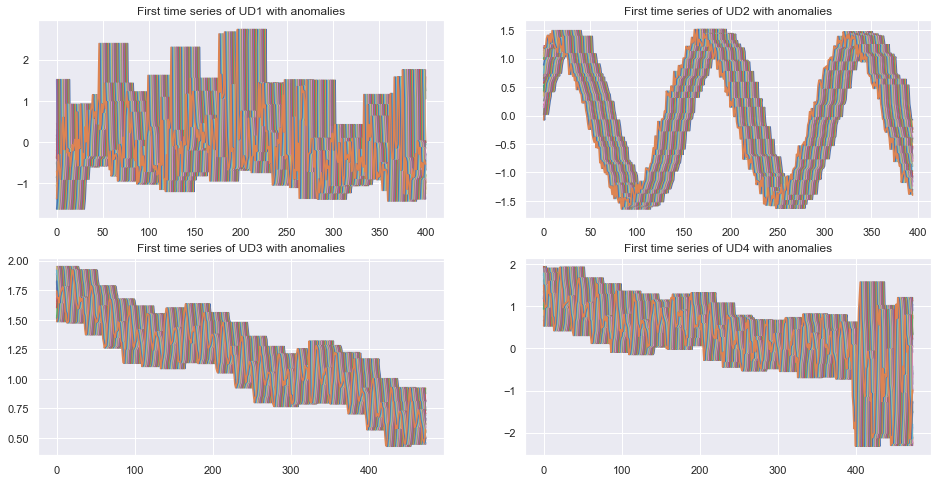

In [163]:
UD1_Noise = np.reshape(UD1_Noise,(-1,32))
UD2_Noise = np.reshape(UD2_Noise,(-1,32))
UD3_Noise = np.reshape(UD3_Noise,(-1,32))
UD4_Noise = np.reshape(UD4_Noise,(-1,32))

figure, axis = plt.subplots(2, 2)
figure.set_figheight(8)
figure.set_figwidth(16)


# For UD1
axis[0, 0].plot(UD1_Noise)
axis[0, 0].set_title("First time series of UD1 with anomalies")
  
# For UD2
axis[0, 1].plot(UD2_Noise)
axis[0, 1].set_title("First time series of UD2 with anomalies")
  
# For UD3
axis[1, 0].plot(UD3_Noise)
axis[1, 0].set_title("First time series of UD3 with anomalies")
  
# For UD4
axis[1, 1].plot(UD4_Noise)
axis[1, 1].set_title("First time series of UD4 with anomalies")
  
# Combine all the operations and display
plt.show()


### without anomalies

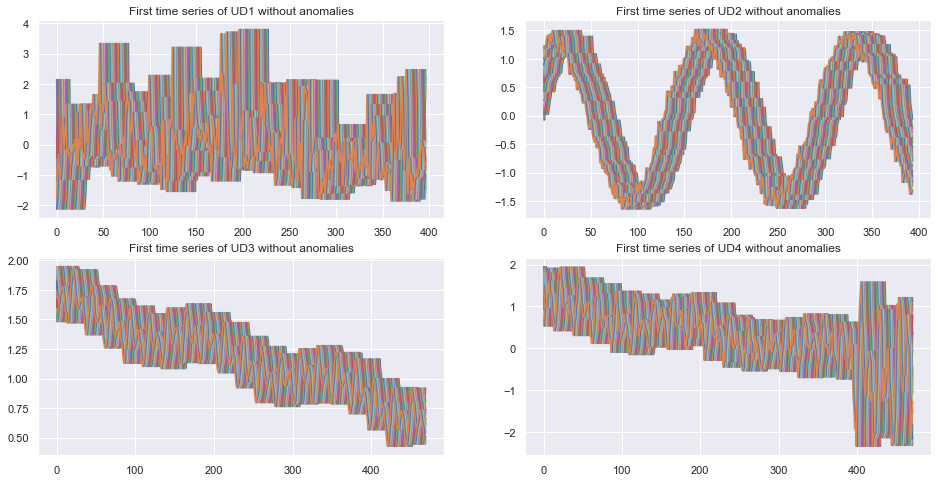

In [164]:
UD1 = np.reshape(UD1,(-1,32))
UD2 = np.reshape(UD2,(-1,32))
UD3 = np.reshape(UD3,(-1,32))
UD4 = np.reshape(UD4,(-1,32))

figure, axis = plt.subplots(2, 2)
figure.set_figheight(8)
figure.set_figwidth(16)


# For UD1
axis[0, 0].plot(UD1)
axis[0, 0].set_title("First time series of UD1 without anomalies")
  
# For UD2
axis[0, 1].plot(UD2)
axis[0, 1].set_title("First time series of UD2 without anomalies")
  
# For UD3
axis[1, 0].plot(UD3)
axis[1, 0].set_title("First time series of UD3 without anomalies")
  
# For UD4
axis[1, 1].plot(UD4)
axis[1, 1].set_title("First time series of UD4 without anomalies")
  
# Combine all the operations and display
plt.show()

## Build an autoencoder (Dense)

We will create an autoencoder with 2 dense layers for the encoding part and the same for the decoding part. We will use Relu as an activation function for the encoding and decoding layers. Linear will be the activation function for the output layer. The model will take 32 timestamps at once, which is the size of the window. 

As we have 4 different time series from different datasets (UD1, UD2, UD3, UD4), we need 4 models with the same architecture but trained with a different time series.

In [165]:
from tensorflow.keras.layers import Flatten

modelUD1 = Sequential()
modelUD2 = Sequential()
modelUD3 = Sequential()
modelUD4 = Sequential()

## Encoder part
# Add a Dense layer with 32 neurons, with relu as activation function
dense_layer_1 = Dense(32,activation='relu', name='encoder_1')
dense_layer_2 = Dense(32,activation='relu', name='encoder_1')
dense_layer_3 = Dense(32,activation='relu', name='encoder_1')
dense_layer_4 = Dense(32,activation='relu', name='encoder_1')

modelUD1.add(dense_layer_1)
modelUD2.add(dense_layer_2)
modelUD3.add(dense_layer_3)
modelUD4.add(dense_layer_4)

# Add a Dense layer with 16 neurons, with relu as activation function
dense_layer_1 = Dense(16,activation='relu', name='encoder_2')
dense_layer_2 = Dense(16,activation='relu', name='encoder_2')
dense_layer_3 = Dense(16,activation='relu', name='encoder_2')
dense_layer_4 = Dense(16,activation='relu', name='encoder_2')
modelUD1.add(dense_layer_1)
modelUD2.add(dense_layer_2)
modelUD3.add(dense_layer_3)
modelUD4.add(dense_layer_4)

modelUD1.add(Flatten())
modelUD2.add(Flatten())
modelUD3.add(Flatten())
modelUD4.add(Flatten())

## Decoder part
# Add a Dense layer with 16 neurons, with relu as activation function
dense_layer_1 = Dense(16,activation='relu', name='decoder_1')
dense_layer_2 = Dense(16,activation='relu', name='decoder_1')
dense_layer_3 = Dense(16,activation='relu', name='decoder_1')
dense_layer_4 = Dense(16,activation='relu', name='decoder_1')
modelUD1.add(dense_layer_1)
modelUD2.add(dense_layer_2)
modelUD3.add(dense_layer_3)
modelUD4.add(dense_layer_4)

# Add a Dense layer with 32 neurons, with relu as activation function
dense_layer_1 = Dense(32,activation='relu', name='decoder_2')
dense_layer_2 = Dense(32,activation='relu', name='decoder_2')
dense_layer_3 = Dense(32,activation='relu', name='decoder_2')
dense_layer_4 = Dense(32,activation='relu', name='decoder_2')
modelUD1.add(dense_layer_1)
modelUD2.add(dense_layer_2)
modelUD3.add(dense_layer_3)
modelUD4.add(dense_layer_4)

# Add an output layer with number of neurons equal to the number of original input, with linear as activation function
output_layer1 =  Dense(32,activation='linear', name="output")
output_layer2 =  Dense(32,activation='linear', name="output")
output_layer3 =  Dense(32,activation='linear', name="output")
output_layer4 =  Dense(32,activation='linear', name="output")
modelUD1.add(output_layer1)
modelUD2.add(output_layer2)
modelUD3.add(output_layer3)
modelUD4.add(output_layer4)

We will use Adam as optimizer, MSE as loss function.

In [166]:
x_train_UD1 = np.array(UD1)
x_train_noise_UD1 = np.array(UD1_Noise)
x_test_UD1 = np.array(UD1_Test)
x_val_UD1 = np.array(UD1_V)

x_train_UD2 = np.array(UD2)
x_train_noise_UD2 = np.array(UD2_Noise)
x_test_UD2 = np.array(UD2_Test)
x_val_UD2 = np.array(UD2_V)

x_train_UD3 = np.array(UD3)
x_train_noise_UD3 = np.array(UD3_Noise)
x_test_UD3 = np.array(UD3_Test)
x_val_UD3 = np.array(UD3_V)

x_train_UD4 = np.array(UD4)
x_train_noise_UD4 = np.array(UD4_Noise)
x_test_UD4 = np.array(UD4_Test)
x_val_UD4 = np.array(UD4_V)

# Compile the model
modelUD1.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
modelUD1.build((x_train_UD1.shape))
modelUD1.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_1 (Dense)           (397, 32)                 1056      
                                                                 
 encoder_2 (Dense)           (397, 16)                 528       
                                                                 
 flatten_16 (Flatten)        (397, 16)                 0         
                                                                 
 decoder_1 (Dense)           (397, 16)                 272       
                                                                 
 decoder_2 (Dense)           (397, 32)                 544       
                                                                 
 output (Dense)              (397, 32)                 1056      
                                                                 
Total params: 3,456
Trainable params: 3,456
Non-train

In [167]:
# Compile the model
modelUD2.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
modelUD2.build((x_train_UD2.shape))
modelUD2.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_1 (Dense)           (394, 32)                 1056      
                                                                 
 encoder_2 (Dense)           (394, 16)                 528       
                                                                 
 flatten_17 (Flatten)        (394, 16)                 0         
                                                                 
 decoder_1 (Dense)           (394, 16)                 272       
                                                                 
 decoder_2 (Dense)           (394, 32)                 544       
                                                                 
 output (Dense)              (394, 32)                 1056      
                                                                 
Total params: 3,456
Trainable params: 3,456
Non-train

In [168]:
# Compile the model
modelUD3.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
modelUD3.build((x_train_UD3.shape))
modelUD3.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_1 (Dense)           (470, 32)                 1056      
                                                                 
 encoder_2 (Dense)           (470, 16)                 528       
                                                                 
 flatten_18 (Flatten)        (470, 16)                 0         
                                                                 
 decoder_1 (Dense)           (470, 16)                 272       
                                                                 
 decoder_2 (Dense)           (470, 32)                 544       
                                                                 
 output (Dense)              (470, 32)                 1056      
                                                                 
Total params: 3,456
Trainable params: 3,456
Non-train

In [169]:
# Compile the model
modelUD4.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
modelUD4.build((x_train_UD4.shape))
modelUD4.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_1 (Dense)           (472, 32)                 1056      
                                                                 
 encoder_2 (Dense)           (472, 16)                 528       
                                                                 
 flatten_19 (Flatten)        (472, 16)                 0         
                                                                 
 decoder_1 (Dense)           (472, 16)                 272       
                                                                 
 decoder_2 (Dense)           (472, 32)                 544       
                                                                 
 output (Dense)              (472, 32)                 1056      
                                                                 
Total params: 3,456
Trainable params: 3,456
Non-train

The size of the batch is 32, while the number of epochs is 50. We will use 10% of the test set as a validation set. I got the validation set from the test set but without anomalies.

In [170]:
historyUD1 = modelUD1.fit(
    x_train_UD1,
    x_train_UD1,
    epochs=50,
    batch_size=32,
    validation_data=(x_val_UD1,x_val_UD1),
    validation_split=0.1
)

Epoch 1/50
12/12 [==============================] - 1s 21ms/step - loss: 1.0487 - accuracy: 0.0252 - val_loss: 1.2019 - val_accuracy: 0.0750
Epoch 2/50
12/12 [==============================] - 0s 4ms/step - loss: 1.0201 - accuracy: 0.0364 - val_loss: 1.1811 - val_accuracy: 0.0750
Epoch 3/50
12/12 [==============================] - 0s 4ms/step - loss: 1.0008 - accuracy: 0.0504 - val_loss: 1.1556 - val_accuracy: 0.1000
Epoch 4/50
12/12 [==============================] - 0s 4ms/step - loss: 0.9766 - accuracy: 0.0588 - val_loss: 1.1207 - val_accuracy: 0.1000
Epoch 5/50
12/12 [==============================] - 0s 4ms/step - loss: 0.9431 - accuracy: 0.0700 - val_loss: 1.0792 - val_accuracy: 0.1000
Epoch 6/50
12/12 [==============================] - 0s 5ms/step - loss: 0.9035 - accuracy: 0.0532 - val_loss: 1.0431 - val_accuracy: 0.0750
Epoch 7/50
12/12 [==============================] - 0s 5ms/step - loss: 0.8581 - accuracy: 0.0560 - val_loss: 1.0144 - val_accuracy: 0.1000
Epoch 8/50
12/12 [=

In [171]:
historyUD2 = modelUD2.fit(
    x_train_UD2,
    x_train_UD2,
    epochs=50,
    batch_size=32,
    validation_data=(x_val_UD2,x_val_UD2),
    validation_split=0.1
)

Epoch 1/50
12/12 [==============================] - 1s 20ms/step - loss: 1.0395 - accuracy: 0.0085 - val_loss: 0.5127 - val_accuracy: 0.0000e+00
Epoch 2/50
12/12 [==============================] - 0s 4ms/step - loss: 0.8985 - accuracy: 0.0085 - val_loss: 0.4401 - val_accuracy: 0.0000e+00
Epoch 3/50
12/12 [==============================] - 0s 4ms/step - loss: 0.7032 - accuracy: 0.0169 - val_loss: 0.3548 - val_accuracy: 0.0000e+00
Epoch 4/50
12/12 [==============================] - 0s 4ms/step - loss: 0.5002 - accuracy: 0.0113 - val_loss: 0.2833 - val_accuracy: 0.0000e+00
Epoch 5/50
12/12 [==============================] - 0s 4ms/step - loss: 0.3396 - accuracy: 0.0085 - val_loss: 0.2193 - val_accuracy: 0.0000e+00
Epoch 6/50
12/12 [==============================] - 0s 4ms/step - loss: 0.2304 - accuracy: 0.0085 - val_loss: 0.1801 - val_accuracy: 0.0250
Epoch 7/50
12/12 [==============================] - 0s 4ms/step - loss: 0.1619 - accuracy: 0.0198 - val_loss: 0.1469 - val_accuracy: 0.1000

In [172]:
historyUD3 = modelUD3.fit(
    x_train_UD3,
    x_train_UD3,
    epochs=50,
    batch_size=32,
    validation_data=(x_val_UD3,x_val_UD3),
    validation_split=0.1
)

Epoch 1/50
14/14 [==============================] - 1s 14ms/step - loss: 1.7064 - accuracy: 0.0071 - val_loss: 0.3828 - val_accuracy: 0.0000e+00
Epoch 2/50
14/14 [==============================] - 0s 4ms/step - loss: 1.0825 - accuracy: 0.0331 - val_loss: 0.2216 - val_accuracy: 0.0426
Epoch 3/50
14/14 [==============================] - 0s 4ms/step - loss: 0.5679 - accuracy: 0.0378 - val_loss: 0.1078 - val_accuracy: 0.0426
Epoch 4/50
14/14 [==============================] - 0s 4ms/step - loss: 0.2262 - accuracy: 0.0378 - val_loss: 0.0403 - val_accuracy: 0.0426
Epoch 5/50
14/14 [==============================] - 0s 4ms/step - loss: 0.0617 - accuracy: 0.0378 - val_loss: 0.0247 - val_accuracy: 0.0426
Epoch 6/50
14/14 [==============================] - 0s 4ms/step - loss: 0.0245 - accuracy: 0.0402 - val_loss: 0.0211 - val_accuracy: 0.0426
Epoch 7/50
14/14 [==============================] - 0s 5ms/step - loss: 0.0188 - accuracy: 0.0307 - val_loss: 0.0207 - val_accuracy: 0.0638
Epoch 8/50
14/1

In [173]:
historyUD4 = modelUD4.fit(
    x_train_UD4,
    x_train_UD4,
    epochs=50,
    batch_size=32,
    validation_data=(x_val_UD4,x_val_UD4),
    validation_split=0.1
)

Epoch 1/50
14/14 [==============================] - 1s 14ms/step - loss: 0.5440 - accuracy: 0.0307 - val_loss: 1.3546 - val_accuracy: 0.0417
Epoch 2/50
14/14 [==============================] - 0s 5ms/step - loss: 0.4807 - accuracy: 0.0307 - val_loss: 1.3814 - val_accuracy: 0.0208
Epoch 3/50
14/14 [==============================] - 0s 4ms/step - loss: 0.3699 - accuracy: 0.0377 - val_loss: 1.4081 - val_accuracy: 0.0000e+00
Epoch 4/50
14/14 [==============================] - 0s 4ms/step - loss: 0.2515 - accuracy: 0.0425 - val_loss: 1.3891 - val_accuracy: 0.0208
Epoch 5/50
14/14 [==============================] - 0s 4ms/step - loss: 0.1845 - accuracy: 0.0590 - val_loss: 1.3451 - val_accuracy: 0.0208
Epoch 6/50
14/14 [==============================] - 0s 4ms/step - loss: 0.1587 - accuracy: 0.0825 - val_loss: 1.2810 - val_accuracy: 0.0417
Epoch 7/50
14/14 [==============================] - 0s 4ms/step - loss: 0.1449 - accuracy: 0.1439 - val_loss: 1.2109 - val_accuracy: 0.0417
Epoch 8/50
14/1

Training the 4 models to take approx 5ms per step which means approx 4s per model because the amount of data is considerably small.

### Visualize the training vs validation loss

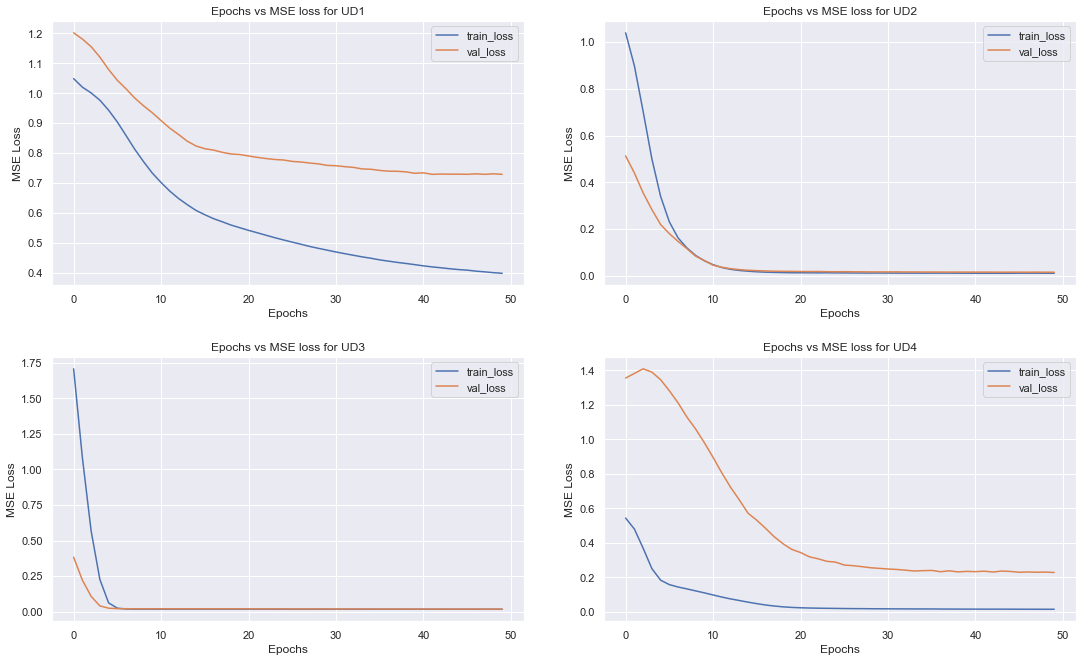

In [174]:
figure, axis = plt.subplots(2, 2)
figure.set_figheight(10)
figure.set_figwidth(16)
figure.tight_layout(pad=4.0)


# For UD1
axis[0, 0].plot(historyUD1.history['loss'])
axis[0, 0].plot(historyUD1.history['val_loss'])
axis[0, 0].set_title("Epochs vs MSE loss for UD1")
axis[0, 0].set_xlabel('Epochs')
axis[0, 0].set_ylabel('MSE Loss')
axis[0, 0].legend(['train_loss', 'val_loss'])
  
# For UD2
axis[0, 1].plot(historyUD2.history['loss'])
axis[0, 1].plot(historyUD2.history['val_loss'])
axis[0, 1].set_title("Epochs vs MSE loss for UD2")
axis[0, 1].set_xlabel('Epochs')
axis[0, 1].set_ylabel('MSE Loss')
axis[0, 1].legend(['train_loss', 'val_loss'])
  
# For UD3
axis[1, 0].plot(historyUD3.history['loss'])
axis[1, 0].plot(historyUD3.history['val_loss'])
axis[1, 0].set_title("Epochs vs MSE loss for UD3")
axis[1, 0].set_xlabel('Epochs')
axis[1, 0].set_ylabel('MSE Loss')
axis[1, 0].legend(['train_loss', 'val_loss'])
  
# For UD4
axis[1, 1].plot(historyUD4.history['loss'])
axis[1, 1].plot(historyUD4.history['val_loss'])
axis[1, 1].set_title("Epochs vs MSE loss for UD4")
axis[1, 1].set_xlabel('Epochs')
axis[1, 1].set_ylabel('MSE Loss')
axis[1, 1].legend(['train_loss', 'val_loss'])

# Combine all the operations and display
plt.show()


From the 4 plots, we can notice that both the training and validation loss start decreasing as the number of epochs increases but at some point, the training and validation loss became stable (no improvement). Therefore, we can say that the early stop can be between 10 (UD2 and UD3) and 20 (UD1 and UD4) epochs.

## Detecting anomalies

### Evaluate the training set without anomalies

To measure the error that occurs when reconstructing an original input, we use the Mean Absolute Error (MAE).

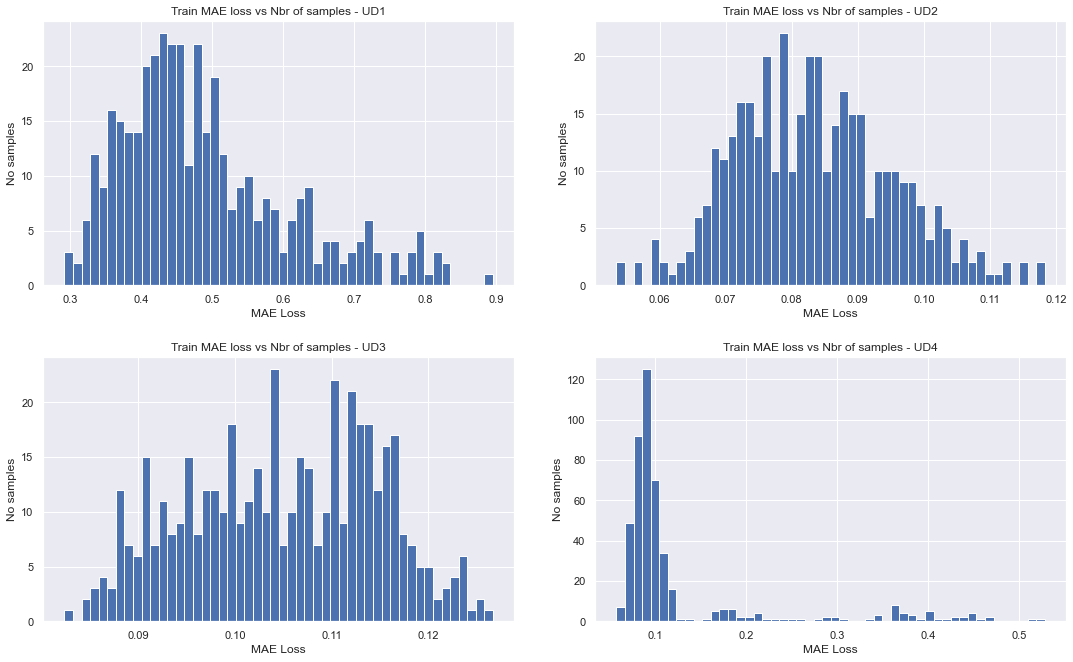

In [175]:
#x_train=x_train
x_train_pred_UD1 = modelUD1.predict(x_train_UD1)
# Get train MAE loss of UD1
train_mae_loss_UD1 = np.mean(np.abs(x_train_pred_UD1 - x_train_UD1), axis=1)

x_train_pred_UD2 = modelUD2.predict(x_train_UD2)
# Get train MAE loss of UD2
train_mae_loss_UD2 = np.mean(np.abs(x_train_pred_UD2 - x_train_UD2), axis=1)

x_train_pred_UD3 = modelUD3.predict(x_train_UD3)
# Get train MAE loss of UD3
train_mae_loss_UD3 = np.mean(np.abs(x_train_pred_UD3 - x_train_UD3), axis=1)

x_train_pred_UD4 = modelUD4.predict(x_train_UD4)
# Get train MAE loss of UD4
train_mae_loss_UD4 = np.mean(np.abs(x_train_pred_UD4 - x_train_UD4), axis=1)


figure, axis = plt.subplots(2, 2)
figure.set_figheight(10)
figure.set_figwidth(16)
figure.tight_layout(pad=4.0)


# For UD1
axis[0, 0].hist(train_mae_loss_UD1, bins=50)
axis[0, 0].set_title("Train MAE loss vs Nbr of samples - UD1")
axis[0, 0].set_xlabel('MAE Loss')
axis[0, 0].set_ylabel('No samples')
  
# For UD2
axis[0, 1].hist(train_mae_loss_UD2, bins=50)
axis[0, 1].set_title("Train MAE loss vs Nbr of samples - UD2")
axis[0, 1].set_xlabel('MAE Loss')
axis[0, 1].set_ylabel('No samples')

  
# For UD3
axis[1, 0].hist(train_mae_loss_UD3, bins=50)
axis[1, 0].set_title("Train MAE loss vs Nbr of samples - UD3")
axis[1, 0].set_xlabel('MAE Loss')
axis[1, 0].set_ylabel('No samples')
  
# For UD4
axis[1, 1].hist(train_mae_loss_UD4, bins=50)
axis[1, 1].set_title("Train MAE loss vs Nbr of samples - UD4")
axis[1, 1].set_xlabel('MAE Loss')
axis[1, 1].set_ylabel('No samples')

# Combine all the operations and display
plt.show()


Another visualization of MAE loss values with respect to timestamps (time).

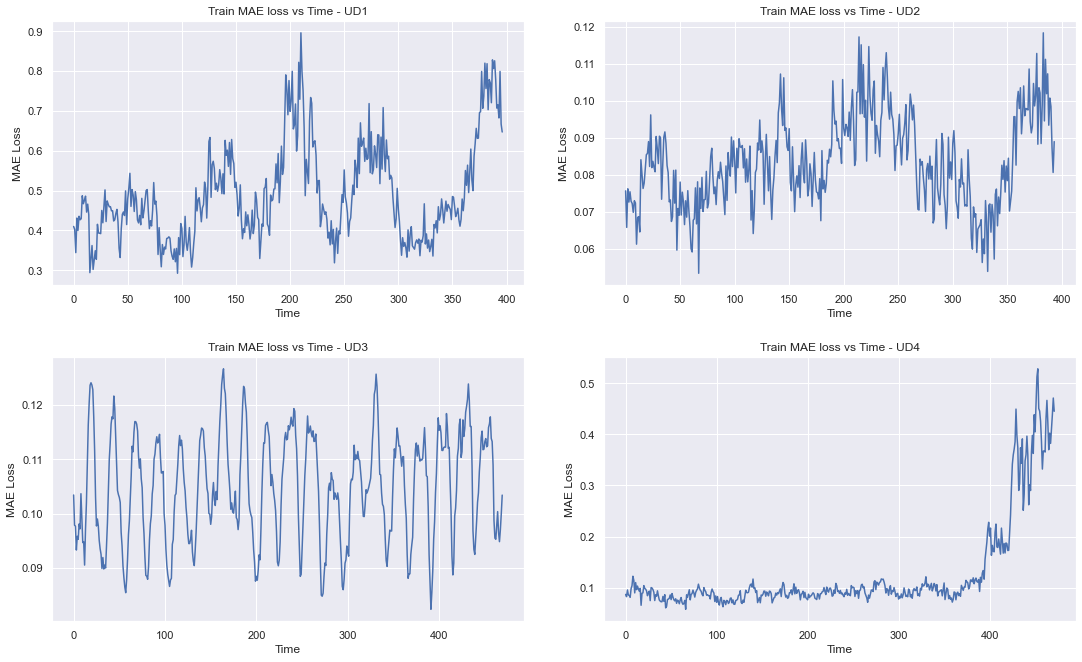

In [176]:
# plot Time vs MAE loss

figure, axis = plt.subplots(2, 2)
figure.set_figheight(10)
figure.set_figwidth(16)
figure.tight_layout(pad=4.0)


# For UD1
axis[0, 0].plot(train_mae_loss_UD1)
axis[0, 0].set_title("Train MAE loss vs Time - UD1")
axis[0, 0].set_xlabel('Time')
axis[0, 0].set_ylabel('MAE Loss')
  
# For UD2
axis[0, 1].plot(train_mae_loss_UD2)
axis[0, 1].set_title("Train MAE loss vs Time - UD2")
axis[0, 1].set_xlabel('Time')
axis[0, 1].set_ylabel('MAE Loss')

  
# For UD3
axis[1, 0].plot(train_mae_loss_UD3)
axis[1, 0].set_title("Train MAE loss vs Time - UD3")
axis[1, 0].set_xlabel('Time')
axis[1, 0].set_ylabel('MAE Loss')
  
# For UD4
axis[1, 1].plot(train_mae_loss_UD4)
axis[1, 1].set_title("Train MAE loss vs Time - UD4")
axis[1, 1].set_xlabel('Time')
axis[1, 1].set_ylabel('MAE Loss')

# Combine all the operations and display
plt.show()


Here we see how our model has recontructed the first 32 timestamps of the time serie of each dataset.

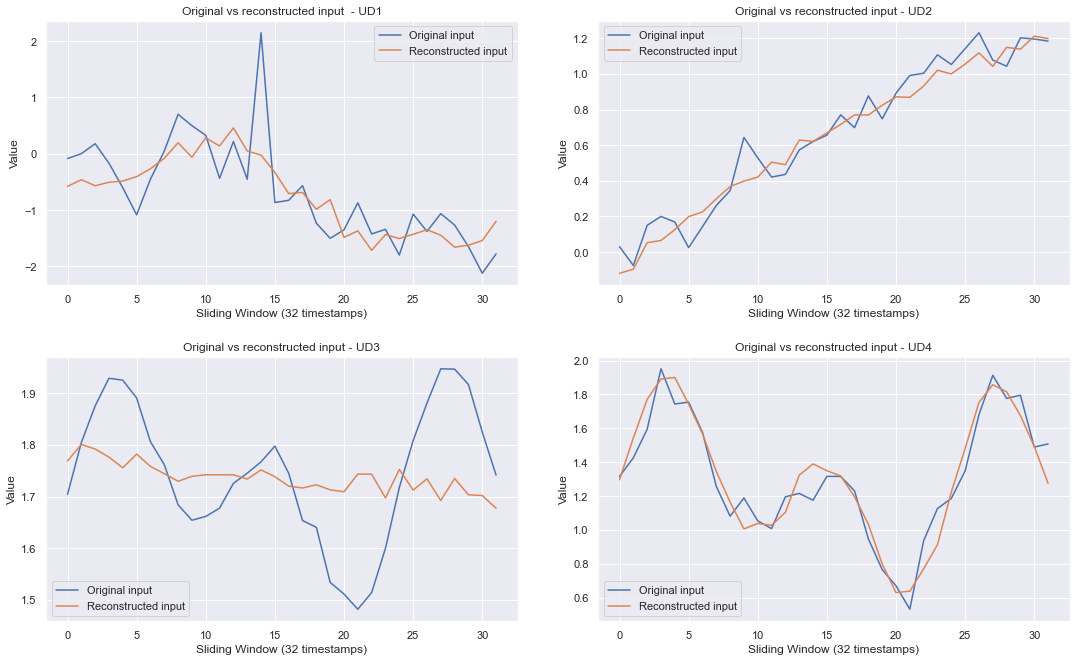

In [177]:
# Checking how the first sequence is learnt
figure, axis = plt.subplots(2, 2)
figure.set_figheight(10)
figure.set_figwidth(16)
figure.tight_layout(pad=4.0)


# For UD1
axis[0, 0].plot(x_train_UD1[0])
axis[0, 0].plot(x_train_pred_UD1[0])
axis[0, 0].set_title("Original vs reconstructed input  - UD1")
axis[0, 0].set_xlabel('Sliding Window (32 timestamps)')
axis[0, 0].set_ylabel('Value')
axis[0, 0].legend(['Original input', 'Reconstructed input'])
  
# For UD2
axis[0, 1].plot(x_train_UD2[0])
axis[0, 1].plot(x_train_pred_UD2[0])
axis[0, 1].set_title("Original vs reconstructed input - UD2")
axis[0, 1].set_xlabel('Sliding Window (32 timestamps)')
axis[0, 1].set_ylabel('Value')
axis[0, 1].legend(['Original input', 'Reconstructed input'])
  
# For UD3
axis[1, 0].plot(x_train_UD3[0])
axis[1, 0].plot(x_train_pred_UD3[0])
axis[1, 0].set_title("Original vs reconstructed input - UD3")
axis[1, 0].set_xlabel('Sliding Window (32 timestamps)')
axis[1, 0].set_ylabel('Value')
axis[1, 0].legend(['Original input', 'Reconstructed input'])
  
# For UD4
axis[1, 1].plot(x_train_UD4[0])
axis[1, 1].plot(x_train_pred_UD4[0])
axis[1, 1].set_title("Original vs reconstructed input - UD4")
axis[1, 1].set_xlabel('Sliding Window (32 timestamps)')
axis[1, 1].set_ylabel('Value')
axis[1, 1].legend(['Original input', 'Reconstructed input'])

# Combine all the operations and display
plt.show()


We can notice that our four models (autoencoders) could generate an output that can be considered as the reconstructed input (there is a resemblance with the original input).

### Evaluate the training set with anomalies

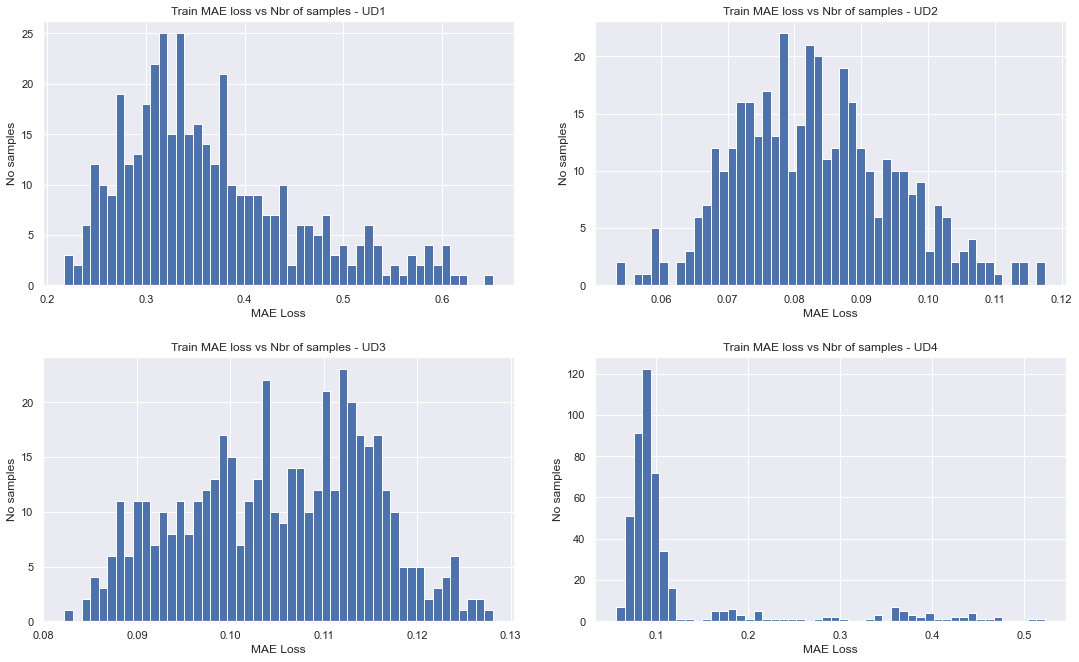

In [178]:
#x_train=x_train
x_train_pred_UD1 = modelUD1.predict(x_train_noise_UD1)
# Get train MAE loss of UD1
train_mae_loss_UD1 = np.mean(np.abs(x_train_pred_UD1 - x_train_noise_UD1), axis=1)

x_train_pred_UD2 = modelUD2.predict(x_train_noise_UD2)
# Get train MAE loss of UD2
train_mae_loss_UD2 = np.mean(np.abs(x_train_pred_UD2 - x_train_noise_UD2), axis=1)

x_train_pred_UD3 = modelUD3.predict(x_train_noise_UD3)
# Get train MAE loss of UD3
train_mae_loss_UD3 = np.mean(np.abs(x_train_pred_UD3 - x_train_noise_UD3), axis=1)

x_train_pred_UD4 = modelUD4.predict(x_train_noise_UD4)
# Get train MAE loss of UD4
train_mae_loss_UD4 = np.mean(np.abs(x_train_pred_UD4 - x_train_noise_UD4), axis=1)


figure, axis = plt.subplots(2, 2)
figure.set_figheight(10)
figure.set_figwidth(16)
figure.tight_layout(pad=4.0)


# For UD1
axis[0, 0].hist(train_mae_loss_UD1, bins=50)
axis[0, 0].set_title("Train MAE loss vs Nbr of samples - UD1")
axis[0, 0].set_xlabel('MAE Loss')
axis[0, 0].set_ylabel('No samples')
  
# For UD2
axis[0, 1].hist(train_mae_loss_UD2, bins=50)
axis[0, 1].set_title("Train MAE loss vs Nbr of samples - UD2")
axis[0, 1].set_xlabel('MAE Loss')
axis[0, 1].set_ylabel('No samples')

  
# For UD3
axis[1, 0].hist(train_mae_loss_UD3, bins=50)
axis[1, 0].set_title("Train MAE loss vs Nbr of samples - UD3")
axis[1, 0].set_xlabel('MAE Loss')
axis[1, 0].set_ylabel('No samples')
  
# For UD4
axis[1, 1].hist(train_mae_loss_UD4, bins=50)
axis[1, 1].set_title("Train MAE loss vs Nbr of samples - UD4")
axis[1, 1].set_xlabel('MAE Loss')
axis[1, 1].set_ylabel('No samples')

# Combine all the operations and display
plt.show()


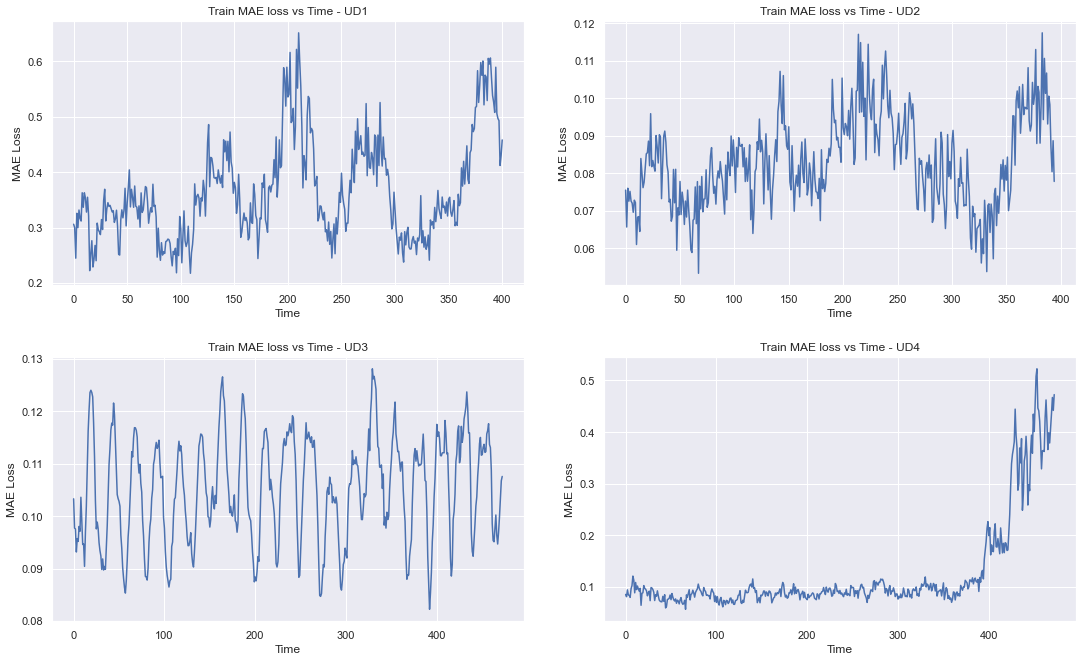

In [179]:
# plot Time vs MAE loss

figure, axis = plt.subplots(2, 2)
figure.set_figheight(10)
figure.set_figwidth(16)
figure.tight_layout(pad=4.0)


# For UD1
axis[0, 0].plot(train_mae_loss_UD1)
axis[0, 0].set_title("Train MAE loss vs Time - UD1")
axis[0, 0].set_xlabel('Time')
axis[0, 0].set_ylabel('MAE Loss')
  
# For UD2
axis[0, 1].plot(train_mae_loss_UD2)
axis[0, 1].set_title("Train MAE loss vs Time - UD2")
axis[0, 1].set_xlabel('Time')
axis[0, 1].set_ylabel('MAE Loss')

  
# For UD3
axis[1, 0].plot(train_mae_loss_UD3)
axis[1, 0].set_title("Train MAE loss vs Time - UD3")
axis[1, 0].set_xlabel('Time')
axis[1, 0].set_ylabel('MAE Loss')
  
# For UD4
axis[1, 1].plot(train_mae_loss_UD4)
axis[1, 1].set_title("Train MAE loss vs Time - UD4")
axis[1, 1].set_xlabel('Time')
axis[1, 1].set_ylabel('MAE Loss')

# Combine all the operations and display
plt.show()


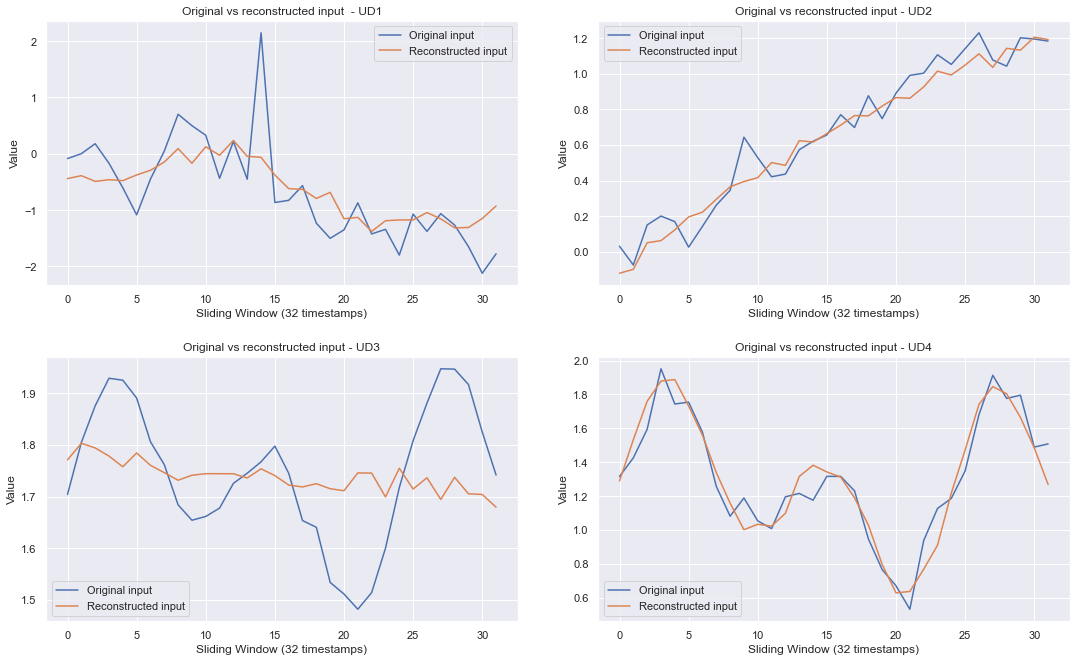

In [180]:
# Checking how the first sequence is learnt
figure, axis = plt.subplots(2, 2)
figure.set_figheight(10)
figure.set_figwidth(16)
figure.tight_layout(pad=4.0)


# For UD1
axis[0, 0].plot(x_train_UD1[0])
axis[0, 0].plot(x_train_pred_UD1[0])
axis[0, 0].set_title("Original vs reconstructed input  - UD1")
axis[0, 0].set_xlabel('Sliding Window (32 timestamps)')
axis[0, 0].set_ylabel('Value')
axis[0, 0].legend(['Original input', 'Reconstructed input'])
  
# For UD2
axis[0, 1].plot(x_train_UD2[0])
axis[0, 1].plot(x_train_pred_UD2[0])
axis[0, 1].set_title("Original vs reconstructed input - UD2")
axis[0, 1].set_xlabel('Sliding Window (32 timestamps)')
axis[0, 1].set_ylabel('Value')
axis[0, 1].legend(['Original input', 'Reconstructed input'])
  
# For UD3
axis[1, 0].plot(x_train_UD3[0])
axis[1, 0].plot(x_train_pred_UD3[0])
axis[1, 0].set_title("Original vs reconstructed input - UD3")
axis[1, 0].set_xlabel('Sliding Window (32 timestamps)')
axis[1, 0].set_ylabel('Value')
axis[1, 0].legend(['Original input', 'Reconstructed input'])
  
# For UD4
axis[1, 1].plot(x_train_UD4[0])
axis[1, 1].plot(x_train_pred_UD4[0])
axis[1, 1].set_title("Original vs reconstructed input - UD4")
axis[1, 1].set_xlabel('Sliding Window (32 timestamps)')
axis[1, 1].set_ylabel('Value')
axis[1, 1].legend(['Original input', 'Reconstructed input'])

# Combine all the operations and display
plt.show()


### Evaluate the test set

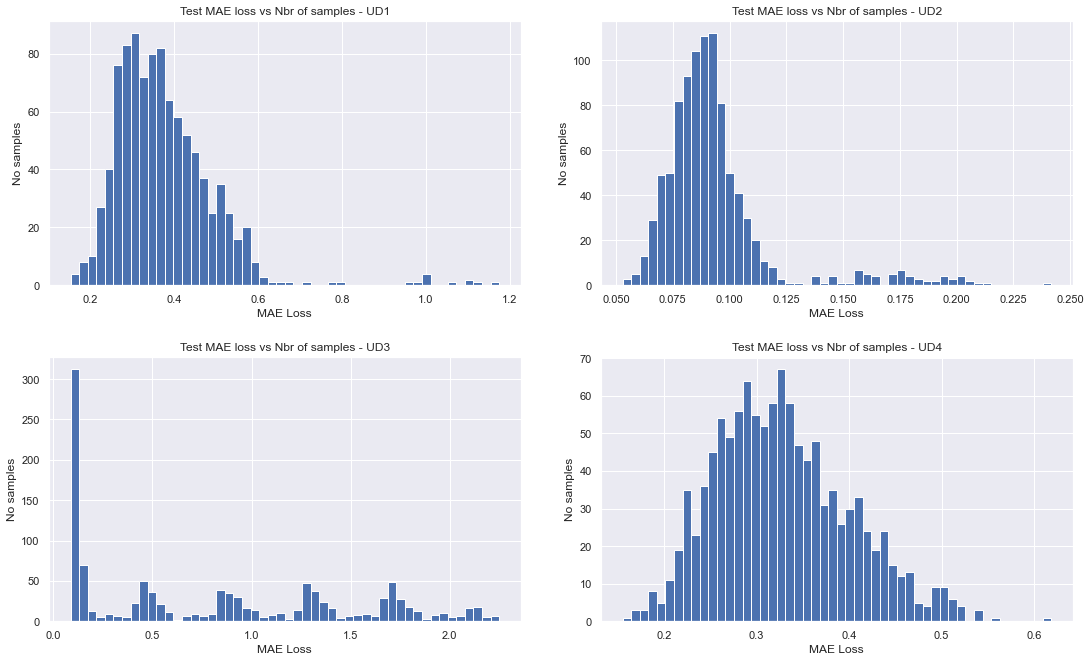

In [181]:
x_test_UD1 = x_test_UD1.reshape((-1,32))
x_test_UD2 = x_test_UD2.reshape((-1,32))
x_test_UD3 = x_test_UD3.reshape((-1,32))
x_test_UD4 = x_test_UD4.reshape((-1,32))


#x_train=x_train
x_test_pred_UD1 = modelUD1.predict(x_test_UD1)
# Get test MAE loss of UD1
test_mae_loss_UD1 = np.mean(np.abs(x_test_pred_UD1 - x_test_UD1), axis=1)

x_test_pred_UD2 = modelUD2.predict(x_test_UD2)
# Get test MAE loss of UD2
test_mae_loss_UD2 = np.mean(np.abs(x_test_pred_UD2 - x_test_UD2), axis=1)

x_test_pred_UD3 = modelUD3.predict(x_test_UD3)
# Get test MAE loss of UD3
test_mae_loss_UD3 = np.mean(np.abs(x_test_pred_UD3 - x_test_UD3), axis=1)

x_test_pred_UD4 = modelUD4.predict(x_test_UD4)
# Get test MAE loss of UD4
test_mae_loss_UD4 = np.mean(np.abs(x_test_pred_UD4 - x_test_UD4), axis=1)


figure, axis = plt.subplots(2, 2)
figure.set_figheight(10)
figure.set_figwidth(16)
figure.tight_layout(pad=4.0)


# For UD1
axis[0, 0].hist(test_mae_loss_UD1, bins=50)
axis[0, 0].set_title("Test MAE loss vs Nbr of samples - UD1")
axis[0, 0].set_xlabel('MAE Loss')
axis[0, 0].set_ylabel('No samples')
  
# For UD2
axis[0, 1].hist(test_mae_loss_UD2, bins=50)
axis[0, 1].set_title("Test MAE loss vs Nbr of samples - UD2")
axis[0, 1].set_xlabel('MAE Loss')
axis[0, 1].set_ylabel('No samples')

  
# For UD3
axis[1, 0].hist(test_mae_loss_UD3, bins=50)
axis[1, 0].set_title("Test MAE loss vs Nbr of samples - UD3")
axis[1, 0].set_xlabel('MAE Loss')
axis[1, 0].set_ylabel('No samples')
  
# For UD4
axis[1, 1].hist(test_mae_loss_UD4, bins=50)
axis[1, 1].set_title("Test MAE loss vs Nbr of samples - UD4")
axis[1, 1].set_xlabel('MAE Loss')
axis[1, 1].set_ylabel('No samples')

# Combine all the operations and display
plt.show()


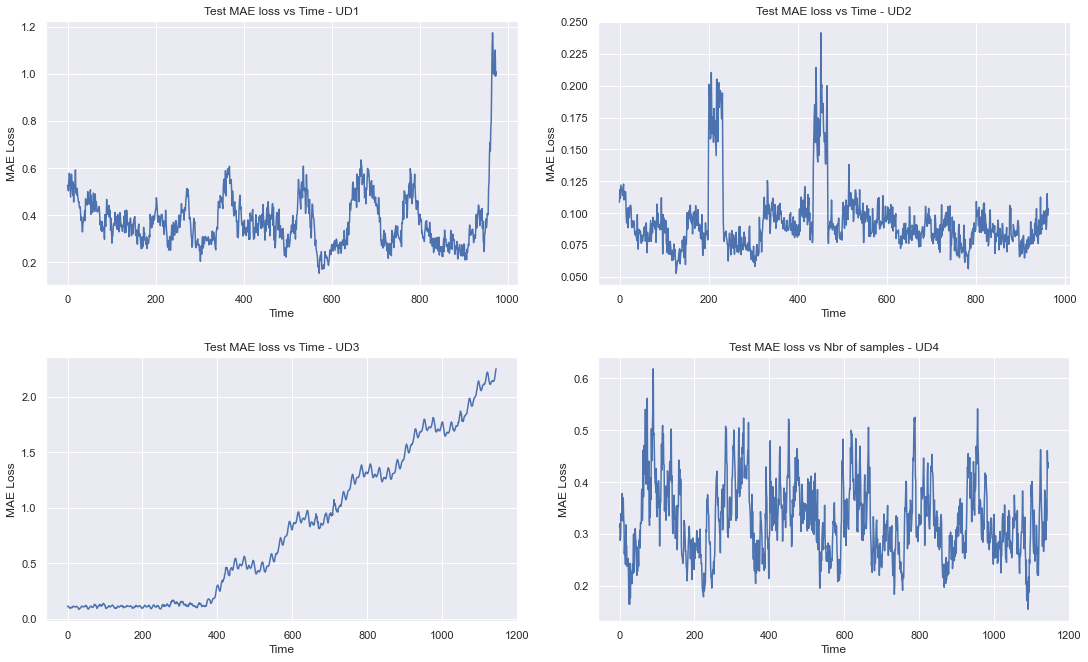

In [182]:
# plot Time vs MAE loss

figure, axis = plt.subplots(2, 2)
figure.set_figheight(10)
figure.set_figwidth(16)
figure.tight_layout(pad=4.0)


# For UD1
axis[0, 0].plot(test_mae_loss_UD1)
axis[0, 0].set_title("Test MAE loss vs Time - UD1")
axis[0, 0].set_xlabel('Time')
axis[0, 0].set_ylabel('MAE Loss')
  
# For UD2
axis[0, 1].plot(test_mae_loss_UD2)
axis[0, 1].set_title("Test MAE loss vs Time - UD2")
axis[0, 1].set_xlabel('Time')
axis[0, 1].set_ylabel('MAE Loss')

  
# For UD3
axis[1, 0].plot(test_mae_loss_UD3)
axis[1, 0].set_title("Test MAE loss vs Time - UD3")
axis[1, 0].set_xlabel('Time')
axis[1, 0].set_ylabel('MAE Loss')
  
# For UD4
axis[1, 1].plot(test_mae_loss_UD4)
axis[1, 1].set_title("Test MAE loss vs Nbr of samples - UD4")
axis[1, 1].set_xlabel('Time')
axis[1, 1].set_ylabel('MAE Loss')

# Combine all the operations and display
plt.show()


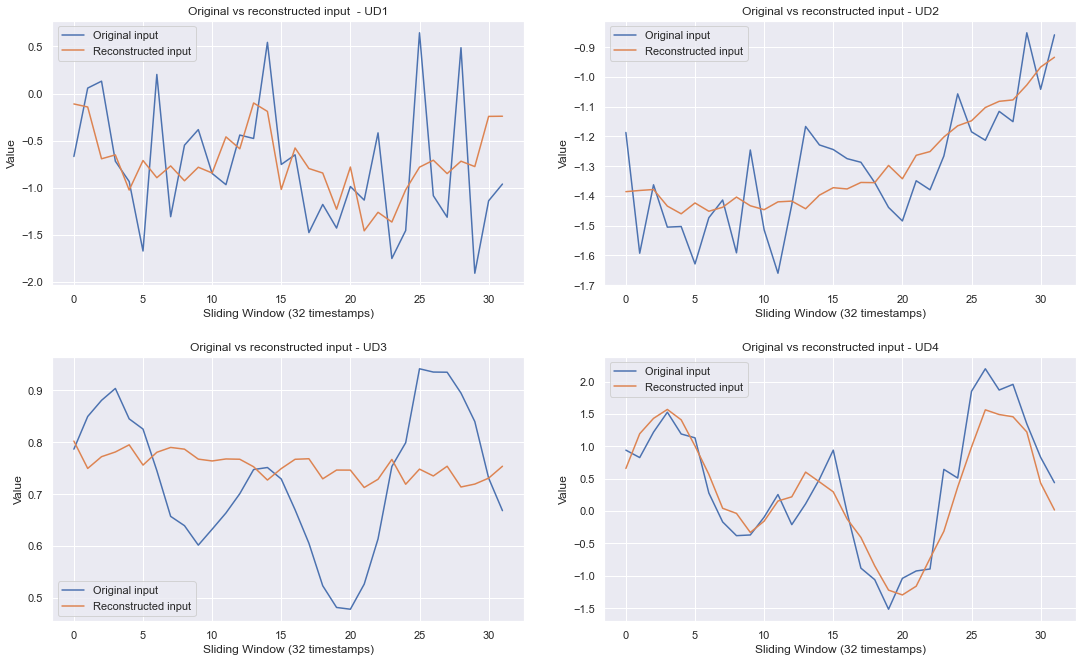

In [183]:
# Checking how the first sequence is learnt
figure, axis = plt.subplots(2, 2)
figure.set_figheight(10)
figure.set_figwidth(16)
figure.tight_layout(pad=4.0)


# For UD1
axis[0, 0].plot(x_test_UD1[0])
axis[0, 0].plot(x_test_pred_UD1[0])
axis[0, 0].set_title("Original vs reconstructed input  - UD1")
axis[0, 0].set_xlabel('Sliding Window (32 timestamps)')
axis[0, 0].set_ylabel('Value')
axis[0, 0].legend(['Original input', 'Reconstructed input'])
  
# For UD2
axis[0, 1].plot(x_test_UD2[0])
axis[0, 1].plot(x_test_pred_UD2[0])
axis[0, 1].set_title("Original vs reconstructed input - UD2")
axis[0, 1].set_xlabel('Sliding Window (32 timestamps)')
axis[0, 1].set_ylabel('Value')
axis[0, 1].legend(['Original input', 'Reconstructed input'])
  
# For UD3
axis[1, 0].plot(x_test_UD3[0])
axis[1, 0].plot(x_test_pred_UD3[0])
axis[1, 0].set_title("Original vs reconstructed input - UD3")
axis[1, 0].set_xlabel('Sliding Window (32 timestamps)')
axis[1, 0].set_ylabel('Value')
axis[1, 0].legend(['Original input', 'Reconstructed input'])
  
# For UD4
axis[1, 1].plot(x_test_UD4[0])
axis[1, 1].plot(x_test_pred_UD4[0])
axis[1, 1].set_title("Original vs reconstructed input - UD4")
axis[1, 1].set_xlabel('Sliding Window (32 timestamps)')
axis[1, 1].set_ylabel('Value')
axis[1, 1].legend(['Original input', 'Reconstructed input'])

# Combine all the operations and display
plt.show()


We can notice that the 4 models have some problems with the reconstruction of the original input because the training phase was insufficient.

## Area under the curve (AUC)

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: True Positive Rate on y axis and False Positive Rate on x axis.  
AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1). AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

To calculate the ROC and the AUC score, we need first to define the set of thresholds that we are going to use.
From the plot "Time vs Test MAE loss", we identify the possible values of a threshold between 0 and 0.65.

In [184]:
Thresholds = np.arange(0, 0.65, 0.02)

We compare the reconstructed input with the original one. If the threshold is higher than the reconstructed input, we label the sample as a 0, and with 1 on the contrary. After that, we calculate the true positive rate(TPR) and the false positive rate(FPR) for each threshold.

In [185]:
def true_false_positive(test_pred_labels, test_labels):
    true_positive = np.equal(test_pred_labels, 1) & np.equal(test_labels, 1)
    true_negative = np.equal(test_pred_labels, 0) & np.equal(test_labels, 0)
    false_positive = np.equal(test_pred_labels, 1) & np.equal(test_labels, 0)
    false_negative = np.equal(test_pred_labels, 0) & np.equal(test_labels, 1)

    tpr = round(true_positive.sum() / (true_positive.sum() + false_negative.sum()),2)
    fpr = round(false_positive.sum() / (false_positive.sum() + true_negative.sum()),2)

    return tpr, fpr

In [186]:
from sklearn.metrics import roc_auc_score
ROC_UD1 = []
AUC_UD1 = []
test_labels_UD1 = np.array(UD1_labels)
print(test_labels_UD1.shape)
ROC_UD2 = []
AUC_UD2 = []
test_labels_UD2 = np.array(UD2_labels)

ROC_UD3 = []
AUC_UD3 = []
test_labels_UD3 = np.array(UD3_labels)

ROC_UD4 = []
AUC_UD4 = []
test_labels_UD4 = np.array(UD4_labels)

for c in range(0,4):
    
    for i in range(len(Thresholds)):
            if c == 0:
                test_pred_labels = np.greater_equal(test_mae_loss_UD1, Thresholds[i]).astype(int)
                tpr, fpr = true_false_positive(test_pred_labels, test_labels_UD1)
                ROC_UD1 = np.append(ROC_UD1, [fpr, tpr])
                auc_value = round(roc_auc_score(test_labels_UD1,test_pred_labels),2)
                AUC_UD1.append(auc_value)
                str = f"AUC UD1 with the threshold {Thresholds[i]} is {auc_value} with TPR = {tpr} and FPR = {fpr}"
                print(str)
            elif c == 1:
                test_pred_labels = np.greater_equal(test_mae_loss_UD2, Thresholds[i]).astype(int)
                tpr, fpr = true_false_positive(test_pred_labels, test_labels_UD2)
                ROC_UD2 = np.append(ROC_UD2, [fpr, tpr])
                auc_value = round(roc_auc_score(test_labels_UD2,test_pred_labels),2)
                AUC_UD2.append(auc_value)
                str = f"AUC UD2 with the threshold {Thresholds[i]} is {auc_value} with TPR = {tpr} and FPR = {fpr}"
                print(str)
            elif c == 2:
                test_pred_labels = np.greater_equal(test_mae_loss_UD3, Thresholds[i]).astype(int)
                tpr, fpr = true_false_positive(test_pred_labels, test_labels_UD3)
                ROC_UD3 = np.append(ROC_UD3, [fpr, tpr])
                auc_value = round(roc_auc_score(test_labels_UD3,test_pred_labels),2)
                AUC_UD3.append(auc_value)
                str = f"AUC UD3 with the threshold {Thresholds[i]} is {auc_value} with TPR = {tpr} and FPR = {fpr}"
                print(str)
            elif c == 3:
                test_pred_labels = np.greater_equal(test_mae_loss_UD4, Thresholds[i]).astype(int)
                tpr, fpr = true_false_positive(test_pred_labels, test_labels_UD4)
                ROC_UD4 = np.append(ROC_UD4, [fpr, tpr])
                auc_value = round(roc_auc_score(test_labels_UD4,test_pred_labels),2)
                AUC_UD4.append(auc_value)
                str = f"AUC UD4 with the threshold {Thresholds[i]} is {auc_value} with TPR = {tpr} and FPR = {fpr}"
                print(str)
    print(".\n")

(975,)
AUC UD1 with the threshold 0.0 is 0.5 with TPR = 1.0 and FPR = 1.0
AUC UD1 with the threshold 0.02 is 0.5 with TPR = 1.0 and FPR = 1.0
AUC UD1 with the threshold 0.04 is 0.5 with TPR = 1.0 and FPR = 1.0
AUC UD1 with the threshold 0.06 is 0.5 with TPR = 1.0 and FPR = 1.0
AUC UD1 with the threshold 0.08 is 0.5 with TPR = 1.0 and FPR = 1.0
AUC UD1 with the threshold 0.1 is 0.5 with TPR = 1.0 and FPR = 1.0
AUC UD1 with the threshold 0.12 is 0.5 with TPR = 1.0 and FPR = 1.0
AUC UD1 with the threshold 0.14 is 0.5 with TPR = 1.0 and FPR = 1.0
AUC UD1 with the threshold 0.16 is 0.5 with TPR = 1.0 and FPR = 1.0
AUC UD1 with the threshold 0.18 is 0.5 with TPR = 1.0 and FPR = 0.99
AUC UD1 with the threshold 0.2 is 0.51 with TPR = 1.0 and FPR = 0.99
AUC UD1 with the threshold 0.22 is 0.51 with TPR = 1.0 and FPR = 0.97
AUC UD1 with the threshold 0.24 is 0.53 with TPR = 1.0 and FPR = 0.94
AUC UD1 with the threshold 0.26 is 0.55 with TPR = 1.0 and FPR = 0.9
AUC UD1 with the threshold 0.28 is 0

We visualize the AUC_values where the threshold will be on the X axis and the AUC value will be on the Y axis

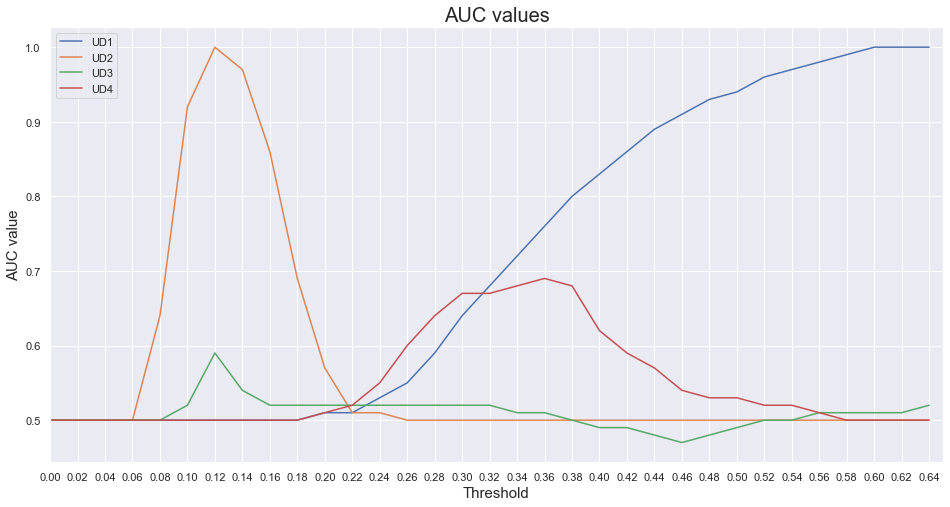

In [187]:
AUC_UD1 = np.array(AUC_UD1).reshape(-1, 1)
AUC_UD2 = np.array(AUC_UD2).reshape(-1, 1)
AUC_UD3 = np.array(AUC_UD3).reshape(-1, 1)
AUC_UD4 = np.array(AUC_UD4).reshape(-1, 1)
Thresholds = np.array(Thresholds).reshape(-1,1)

plt.figure(figsize=(16,8))
plt.plot(Thresholds,AUC_UD1)
plt.plot(Thresholds,AUC_UD2)
plt.plot(Thresholds,AUC_UD3)
plt.plot(Thresholds,AUC_UD4)
plt.xlim(0, 0.65)
plt.xticks(Thresholds)
plt.title('AUC values',fontsize=20)
plt.xlabel('Threshold',fontsize=15)
plt.ylabel('AUC value',fontsize=15)
plt.legend(["UD1","UD2","UD3","UD4"])
plt.show()

Finally, we visualize the ROC_curve where each pair of TPR and FPR represent a threshold.

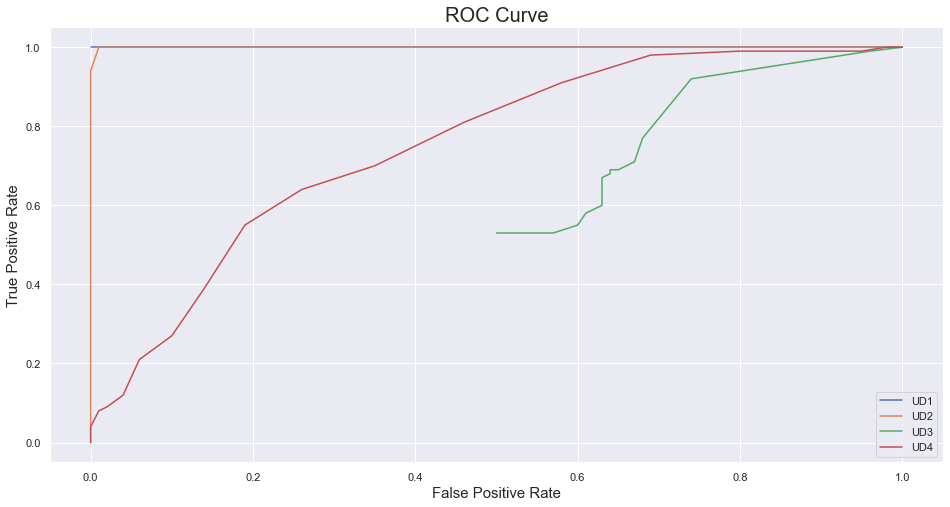

In [188]:
plt.figure(figsize=(16,8))
ROC_UD1 = ROC_UD1.reshape(-1, 2)
ROC_UD2 = ROC_UD2.reshape(-1, 2)
ROC_UD3 = ROC_UD3.reshape(-1, 2)
ROC_UD4 = ROC_UD4.reshape(-1, 2)

plt.plot(ROC_UD1[:,0],ROC_UD1[:,1])
plt.plot(ROC_UD2[:,0],ROC_UD2[:,1])
plt.plot(ROC_UD3[:,0],ROC_UD3[:,1])
plt.plot(ROC_UD4[:,0],ROC_UD4[:,1])
plt.title('ROC Curve',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.legend(["UD1","UD2","UD3","UD4"])

## Results

From the AUC and ROC curve, we conclude the following results:
- For UD1, the best AUC value is 0.1 (100%) with the threshold 0.62 where the true positive rate is 100% and the false positive rate is 0%.
- For UD2, the best AUC value is 0.1 (100%) with the threshold 0.12 where the true positive rate is 100% and the false positive rate is 1%.
- For UD3, the best AUC value is 0.59 (59%) with the threshold 0.12 where the true positive rate is 92% and the false positive rate is 74%. This weak results is due to the fact that the value of MAE loss increases as the time increases to reach at the end 2.
- For UD4, the best AUC value is 0.69 (69%) with the threshold 0.36 where the true positive rate is 64% and the false positive rate is 26%.

The best ROC curve is the one where TPR is 1.0 and FPR is 0.0 which means an AUC value of 100%.  
We can notice that UD1 and UD2 have the best curve followed by UD4 and finally UD3.  

We note that these results do not represent the true or the final results as we trained only one time series per dataset.